In [188]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
with open("analyses.pkl", "rb") as f:
    l = pickle.load(f)

In [182]:
df_sha = pd.DataFrame([x.sha256 for x in l])
l = [x.last_analysis_stats for x in l]

In [183]:
df = pd.DataFrame(l)
df = pd.concat([df_sha, df], axis=1)

In [184]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'confirmed-timeout'
    df = df.drop(columns=['confirmed-timeout'])
    # Drop column: 'suspicious'
    df = df.drop(columns=['suspicious'])
    # Drop column: 'type-unsupported'
    df = df.drop(columns=['type-unsupported'])
    # Drop column: 'timeout'
    df = df.drop(columns=['timeout'])
    # Drop column: 'harmless'
    df = df.drop(columns=['harmless'])
    df.rename({0: "sha256"}, inplace=True, axis=1)
    df = df.drop(columns=["failure", "undetected"])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,sha256,malicious
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,63
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,61
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,59
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,62
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,58


In [185]:
data = pd.read_csv("lk_dataset/data/df.csv")

data.drop(columns=["added_features"], inplace=True)
df = pd.merge(data, df_clean, left_on="malware", right_on="sha256", how="inner").drop(columns=["sha256"]).rename({"malicious": "N_orig"}, axis=1)
df = pd.merge(df, df_clean, left_on="obfuscated", right_on="sha256", how="left").drop(columns=["sha256"]).rename({"malicious": "N_adv"}, axis=1)
df

,malware,obfuscated,N_orig,N_adv
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,5b9164689577a842431c52a21c460bc1308f6811ad9429...,63,24
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,6d78a7d9096113f41b9a3c355321f920b9f305581e8d20...,61,44
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,f517d659573c088823990e7f8d199d97a8003f22e8aa03...,59,41
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,ecc05603a6a024c2fac657565fd50aec7659af925b63f5...,62,52
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,4be3f114e94be8923eb4a7dc3a3bc2fd82d37962e6cf08...,58,38
...,...,...,...,...
99,b552f7464a49cb46efa58cc187c24840323260ef3af505...,f4ce8d127b5bed008273ce835f03b53fea56887fb1711e...,52,42
100,210f2d1def90a522af155a968e10aca143b5a79c692dfb...,82185b629e3bd616fb96b73db75fbe82c7a10105ce3f69...,26,24
101,3c8c8bf3b71a6eebf52f484da1569b2000fd1c6e621434...,fd4e3678f26d42a6bb92cdfc4b34a5ebe1eb4b25248b45...,66,38
102,3b7828a7ed4b80fcc7276f6554a1a9500f7e0a1b87e986...,156d2c036f2b1849b7e1802da11f020cc46f06d0ca9b2c...,65,39


In [186]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    df["evasive_rate"] = (df["N_orig"] - df["N_adv"]) / df["N_orig"]
    df["evasive_rate"] = df["evasive_rate"].clip(lower=0)
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,malware,obfuscated,N_orig,N_adv,evasive_rate
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,5b9164689577a842431c52a21c460bc1308f6811ad9429...,63,24,0.619048
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,6d78a7d9096113f41b9a3c355321f920b9f305581e8d20...,61,44,0.278689
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,f517d659573c088823990e7f8d199d97a8003f22e8aa03...,59,41,0.305085
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,ecc05603a6a024c2fac657565fd50aec7659af925b63f5...,62,52,0.161290
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,4be3f114e94be8923eb4a7dc3a3bc2fd82d37962e6cf08...,58,38,0.344828


In [187]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean):
    # Drop duplicate rows in columns: 'malware', 'obfuscated'
    df_clean = df_clean.drop_duplicates(subset=['malware', 'obfuscated'])
    return df_clean

df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head()

,malware,obfuscated,N_orig,N_adv,evasive_rate
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,5b9164689577a842431c52a21c460bc1308f6811ad9429...,63,24,0.619048
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,6d78a7d9096113f41b9a3c355321f920b9f305581e8d20...,61,44,0.278689
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,f517d659573c088823990e7f8d199d97a8003f22e8aa03...,59,41,0.305085
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,ecc05603a6a024c2fac657565fd50aec7659af925b63f5...,62,52,0.161290
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,4be3f114e94be8923eb4a7dc3a3bc2fd82d37962e6cf08...,58,38,0.344828


In [243]:
mean = df_clean_1["evasive_rate"].mean()
stdev = df_clean_1["evasive_rate"].std()

print(f"PERTURBED. Mean: {mean}, Stdev: {stdev}")

PERTURBED. Mean: 0.312718292800472, Stdev: 0.20584201273747008


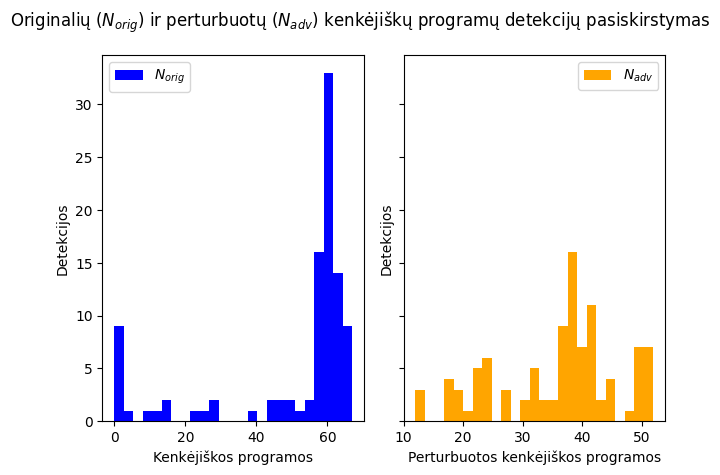

In [246]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(df_clean_1["N_orig"], bins=25, label="$N_{orig}$", color="blue")
axs[1].hist(df_clean_1["N_adv"], bins=25, label="$N_{adv}$", color="orange")
axs[0].set_xlabel("Kenkėjiškos programos")
axs[1].set_xlabel("Perturbuotos kenkėjiškos programos")
axs[0].set_ylabel("Detekcijos")
axs[1].set_ylabel("Detekcijos")
axs[0].legend()
axs[1].legend()
plt.suptitle("Originalių ($N_{orig}$) ir perturbuotų ($N_{adv}$) kenkėjiškų programų detekcijų pasiskirstymas")
plt.show()